## Netflix Dataset

In [1]:
# IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv("netflix_titles.csv")

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df['date_added'] = pd.to_datetime(df['date_added'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


In [6]:
df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."


**Numerical Column Describe**

In [7]:
# numerical column statistics
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


**Categorical Column Describe**

In [8]:
# caregorical column statistics
df.describe(include='O')

,show_id,type,title,director,cast,country,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,3207,1793,362,4


In [9]:
df['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

**Date Analysis**

In [10]:
df.groupby(['release_year']).agg({"title":"count"}).sort_values(by="title",ascending=False)

,title
release_year,
2018,1147
2017,1032
2019,1030
2020,953
2016,902
...,...
1959,1
1961,1
1947,1


<AxesSubplot:>

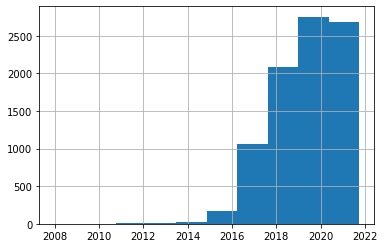

In [11]:
df['date_added'].hist()

<AxesSubplot:>

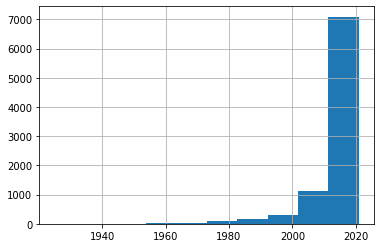

In [12]:
df['release_year'].hist()

In [13]:
import plotly.express as px
px.histogram(df,x='release_year').update_layout(bargap=0.2)

In [14]:
df[df['release_year']<1930]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4250,s4251,TV Show,Pioneers: First Women Filmmakers*,NaN,NaN,NaN,2018-12-30,1925,TV-14,1 Season,TV Shows,This collection restores films from women who ...


In [15]:
px.histogram(df,x='date_added')
# .update_layout(bargap=0.2)

In [16]:
# extract month from date added
df['month_added'] = df['date_added'].dt.month.fillna(0)

In [17]:
px.histogram(df,x='date_added',color='month_added') # histogram 

In [18]:
# extract date from date added
df['day_added'] = df['date_added'].dt.day.fillna(0)

In [19]:
px.histogram(df,x='day_added',color="type")

So,they are releasing more movies on 1st day of month

**String column analysis**

In [20]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'month_added', 'day_added'],
      dtype='object')

In [21]:
df['country'].str.split(',',expand=True)

,0,1,2,3,4,5,6,7,8,9,10,11
0,United States,None,None,None,None,None,None,None,None,None,None,None
1,South Africa,None,None,None,None,None,None,None,None,None,None,None
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,India,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,United States,None,None,None,None,None,None,None,None,None,None,None
8803,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8804,United States,None,None,None,None,None,None,None,None,None,None,None
8805,United States,None,None,None,None,None,None,None,None,None,None,None


In [22]:
country_count = df.copy()

In [31]:
country_count = pd.concat([df,df['country'].str.split(',',expand=True)],axis="columns")
country_count = country_count.melt(id_vars=['type','title'],value_vars=range(12))
country_count = country_count[country_count["value"].notna()]
country_count["value"] = country_count["value"].str.strip()
country_count.head()

,type,title,variable,value
0,Movie,Dick Johnson Is Dead,0,United States
1,TV Show,Blood & Water,0,South Africa
4,TV Show,Kota Factory,0,India
7,Movie,Sankofa,0,United States
8,TV Show,The Great British Baking Show,0,United Kingdom


In [32]:
px.histogram(country_count, "value")